In [70]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime
from selenium import webdriver
import time
import requests
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [131]:
sanup = pd.read_csv("표준산업분류.csv", encoding='ANSI', skiprows=1) #첫번째줄이 연도만 표시되어있어 제외하고 읽기
sanup = sanup[sanup['총근로일수 (일)'] != '-'] #특수형태의 데이터가 크게 차이나지 않아 통계를 위해 제외
sanup.reset_index(inplace=True, drop=True) #사라진 특수형태의 데이터를 제외하고 다시 index 구성
sanup = sanup.astype({'총근로일수 (일)':'float', '총근로시간 (시간)':'float', '소정실근로시간 (시간)':'float', '초과근로시간 (시간)':'float', 
                      '휴일근로시간 (시간)':'float', '시간당임금총액 (원)':'int', '시간당정액급여 (원)':'int', '월임금총액 (천원)':'int', 
                      '월급여액 (천원)':'int', '정액급여 (천원)':'int', '초과급여 (천원)':'int', '전년도 연간특별급여/12개월 (천원)':'int', '전년도 연간특별급여 (천원)':'int'})
sanupdata = sanup[:19] #전체 근로자 데이터만 뽑아오기


,고용형태,산업분류별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원)
0,전체근로자,전체,19.6,154.9,147.4,7.5,2.2,22651,20308,3526,3172,2992,180,355,4255
1,전체근로자,"A.농업, 임업 및 어업(01~03)",19.8,153.7,149.2,4.5,2.4,20469,18147,3113,2748,2667,81,364,4372
2,전체근로자,B.광업(05~08),21.8,180.0,160.6,19.4,8.7,24662,22058,4298,3917,3487,430,381,4573
3,전체근로자,C.제조업(10~34),20.4,174.1,156.7,17.4,5.5,23929,20118,4114,3550,3136,414,564,6769
4,전체근로자,"D.전기, 가스, 증기 및 공기 조절 공급업(35)",20.3,168.8,160.6,8.1,2.6,37468,28937,6268,4932,4604,328,1336,16030
5,전체근로자,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",21.1,177.0,162.3,14.7,4.6,22568,20361,3937,3621,3286,335,317,3801
6,전체근로자,F.건설업(41~42),16.1,128.8,125.7,3.2,0.8,24261,23519,3094,2977,2889,89,116,1394
7,전체근로자,G.도매 및 소매업(45~47),20.1,155.9,152.4,3.5,1.1,21563,19890,3425,3163,3086,76,262,3148
8,전체근로자,H.운수 및 창고업(49~52),20.3,164.4,152.4,11.9,3.2,21911,19288,3583,3228,2934,294,356,4271
9,전체근로자,I.숙박 및 음식점업(55~56),18.3,130.1,126.3,3.8,1.2,12811,12550,1707,1681,1615,67,26,310


In [136]:
for k in range(len(sanupdata)):
    if '.' in sanupdata['산업분류별'][k]:
        sanupdata['산업분류별'][k] = sanupdata['산업분류별'][k].split('.')[1].strip()
    if '(' in sanupdata['산업분류별'][k]:
        sanupdata['산업분류별'][k] = sanupdata['산업분류별'][k].split('(')[0].strip()

sanupdata['산업분류별'][17] = sanupdata['산업분류별'][17][2:]
sanupdata['산업분류별'][18] = sanupdata['산업분류별'][18][2:]

C:\Users\user\AppData\Local\Temp\ipykernel_716\4242737171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanupdata['산업분류별'][17] = sanupdata['산업분류별'][17][2:]
C:\Users\user\AppData\Local\Temp\ipykernel_716\4242737171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanupdata['산업분류별'][18] = sanupdata['산업분류별'][18][2:]


In [137]:
sanupdata['산업분류별']

0                           전체
1                  농업, 임업 및 어업
2                           광업
3                          제조업
4       전기, 가스, 증기 및 공기 조절 공급업
5      수도, 하수 및 폐기물 처리, 원료 재생업
6                          건설업
7                     도매 및 소매업
8                     운수 및 창고업
9                    숙박 및 음식점업
10                       정보통신업
11                    금융 및 보험업
12                        부동산업
13            전문, 과학 및 기술 서비스업
14    사업시설 관리, 사업 지원 및 임대 서비스업
15                     교육 서비스업
16              보건업 및 사회복지서비스업
17         예술, 스포츠 및 여가관련 서비스업
18    협회 및 단체, 수리 및 기타 개인 서비스업
Name: 산업분류별, dtype: object

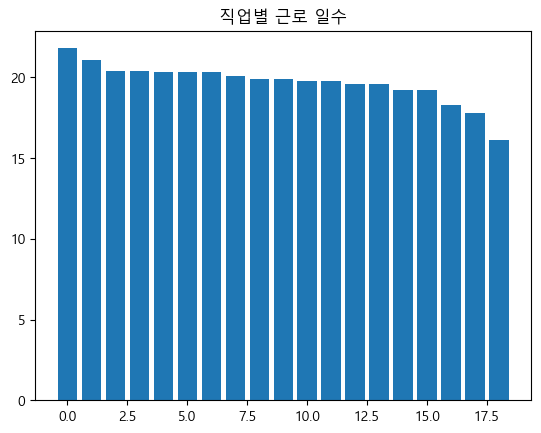

In [150]:
plt.title('직업별 근로 일수')
plt.bar(sanupdata.index, sanupdata['총근로일수 (일)'].sort_values(ascending=False))

plt.show()

In [130]:
for k in range(len(sanupdata)):
    if '.' in sanupdata['산업분류별'][k]:
        sanupdata['산업분류별'][k] = sanupdata['산업분류별'][k].split('.')[1].strip()
    if '(' in sanupdata['산업분류별'][k]:
        sanupdata['산업분류별'][k] = sanupdata['산업분류별'][k].split('(')[0].strip()

sanupdata['산업분류별']

C:\Users\user\AppData\Local\Temp\ipykernel_716\2145489795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanupdata['산업분류별'][k] = sanupdata['산업분류별'][k].split('(')[0].strip()
C:\Users\user\AppData\Local\Temp\ipykernel_716\2145489795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanupdata['산업분류별'][k] = sanupdata['산업분류별'][k].split('(')[0].strip()


0                             전체
1                    농업, 임업 및 어업
2                             광업
3                            제조업
4         전기, 가스, 증기 및 공기 조절 공급업
5        수도, 하수 및 폐기물 처리, 원료 재생업
6                            건설업
7                       도매 및 소매업
8                       운수 및 창고업
9                      숙박 및 음식점업
10                         정보통신업
11                      금융 및 보험업
12                          부동산업
13              전문, 과학 및 기술 서비스업
14      사업시설 관리, 사업 지원 및 임대 서비스업
15                       교육 서비스업
16                보건업 및 사회복지서비스업
17         R 예술, 스포츠 및 여가관련 서비스업
18    S 협회 및 단체, 수리 및 기타 개인 서비스업
Name: 산업분류별, dtype: object

In [124]:
temp = sanupdata['산업분류별'][1].split('.')[1].strip()
a = temp.split('(')[0].strip()
a

'농업, 임업 및 어업'

In [96]:
sanup = IGN_reviewshigh["release_year"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   고용형태                  57 non-null     object 
 1   산업분류별                 57 non-null     object 
 2   총근로일수 (일)             57 non-null     float64
 3   총근로시간 (시간)            57 non-null     float64
 4   소정실근로시간 (시간)          57 non-null     float64
 5   초과근로시간 (시간)           57 non-null     float64
 6   휴일근로시간 (시간)           57 non-null     float64
 7   시간당임금총액 (원)           57 non-null     int32  
 8   시간당정액급여 (원)           57 non-null     int32  
 9   월임금총액 (천원)            57 non-null     int32  
 10  월급여액 (천원)             57 non-null     int32  
 11  정액급여 (천원)             57 non-null     int32  
 12  초과급여 (천원)             57 non-null     int32  
 13  전년도 연간특별급여/12개월 (천원)  57 non-null     int32  
 14  전년도 연간특별급여 (천원)       57 non-null     int32  
dtypes: float64(5), int32(8), 

In [104]:
sanupjung = (sanup["고용형태"] == ["정규근로자"])
sanupjung

ValueError: ('Lengths must match to compare', (57,), (1,))

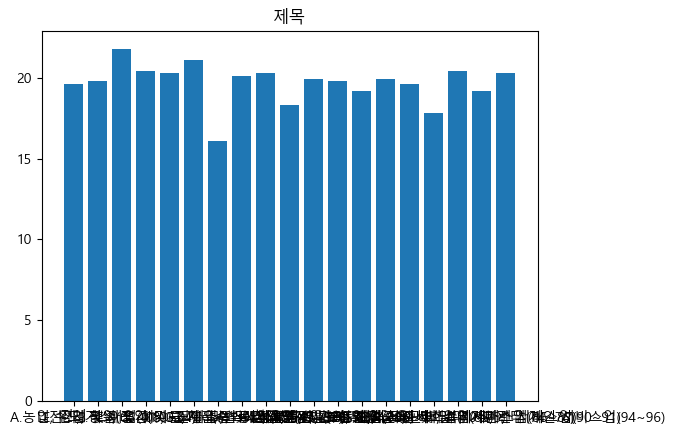

In [108]:

plt.title('제목')
plt.bar(sanupdata['산업분류별'], sanupdata['총근로일수 (일)'])
plt.show()

In [69]:
job = pd.read_csv("표준직업분류.csv", encoding='ANSI', skiprows=1)
job = job[job['총근로일수 (일)'] != '-']
job.reset_index(inplace=True, drop=True)
job

,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원)
0,전체근로자,전직종,19.6,154.9,147.4,7.5,2.2,22651,20308,3526,3172,2992,180,355,4255
1,전체근로자,관리자(1),20.2,164.2,160.7,3.5,0.8,73158,63384,11880,10305,10155,150,1575,18903
2,전체근로자,전문가 및 관련종사자(2),19.9,158.0,152.4,5.5,1.1,27328,24287,4260,3778,3621,157,482,5781
3,전체근로자,사무 종사자(3),20.1,161.0,156.4,4.6,1.1,25786,22856,4157,3695,3580,115,462,5548
4,전체근로자,서비스 종사자(4),19.2,127.3,123.1,4.1,1.2,13378,12987,1729,1686,1604,82,43,515
5,전체근로자,판매 종사자(5),19.0,145.9,142.2,3.6,1.2,18625,17328,2862,2660,2583,77,202,2423
6,전체근로자,농림·어업 숙련 종사자(6),19.8,151.8,145.8,6.0,3.1,16875,16317,2411,2339,2224,115,72,862
7,전체근로자,기능원 및 관련 기능 종사자(7),17.4,141.7,133.9,7.8,3.0,22345,20889,3017,2799,2623,177,218,2613
8,전체근로자,장치·기계 조작 및 조립 종사자(8),20.8,178.6,157.3,21.3,7.0,20322,16895,3609,3144,2635,508,465,5579
9,전체근로자,단순노무 종사자(9),18.3,143.4,135.2,8.2,2.7,14530,13936,2019,1955,1803,152,64,767


0     19.6
1     19.8
2     21.8
3     20.4
4     20.3
5     21.1
6     16.1
7     20.1
8     20.3
9     18.3
10    19.9
11    19.8
12    19.2
13    19.9
14    19.6
15    17.8
16    20.4
17    19.2
18    20.3
19    20.6
20    21.1
21    22.1
22    20.7
23    20.3
24    21.5
25    20.4
26    20.8
27    20.7
28    22.4
29    20.0
30    19.8
31    19.7
32    20.0
33    20.3
34    20.1
35    20.8
36    21.0
37    21.5
38    16.3
39    17.2
40    18.8
41    18.4
42    19.6
43    18.1
44    11.7
45    16.7
46    18.2
47    14.6
48    18.1
49    19.7
50    18.9
51    18.5
52    17.1
53    14.9
54    19.4
55    16.6
56    15.7
Name: 총근로일수 (일), dtype: object